# Handwritten Digit Recognition using ANN

Importing Data

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

In [2]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Visualizing the Data

<Figure size 640x480 with 0 Axes>

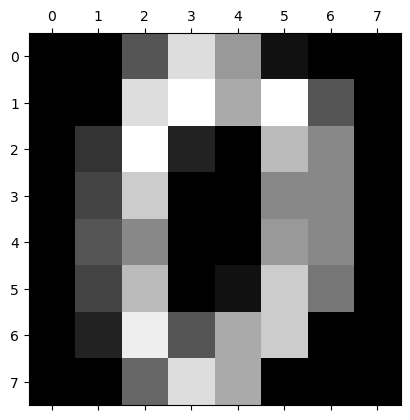

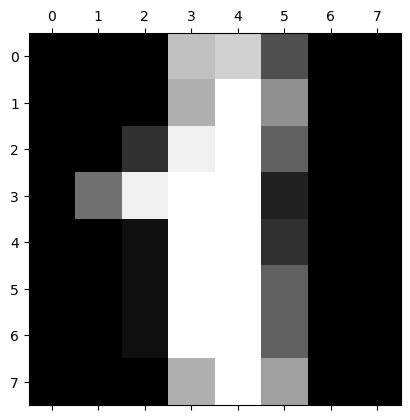

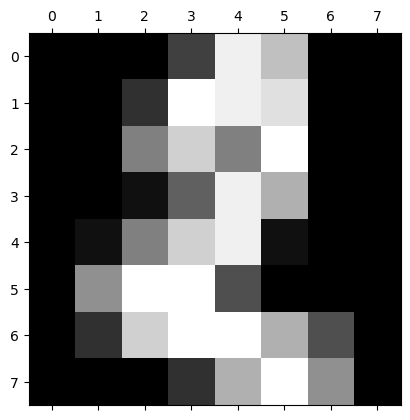

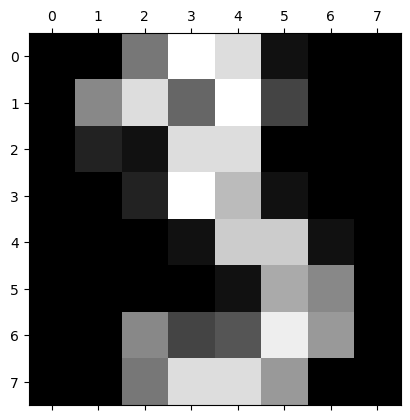

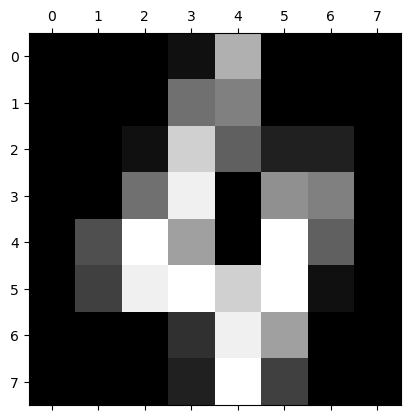

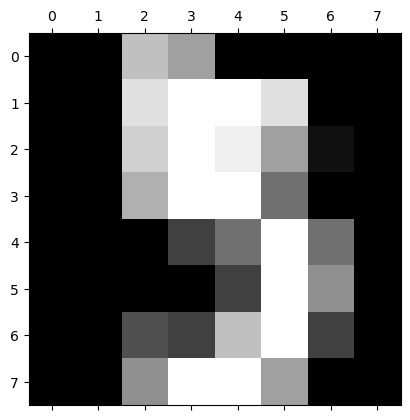

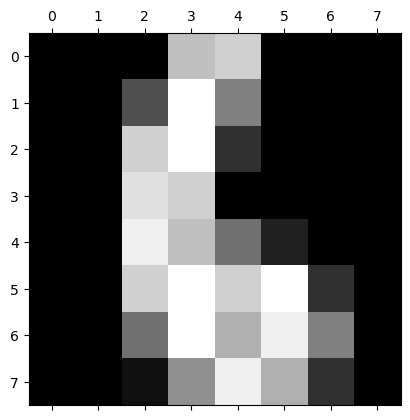

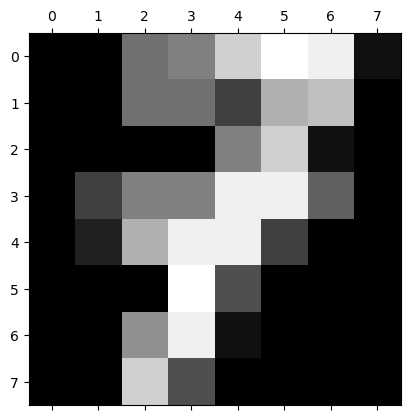

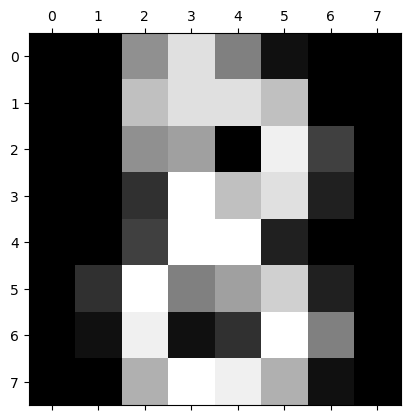

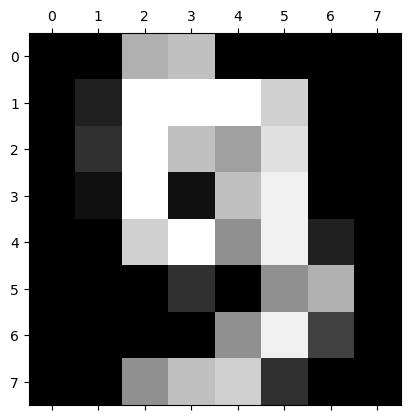

In [4]:
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])

In [5]:
len(digits.data)  # total number of inputs

1797

Splitting data into training and testing data set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)
len(X_train)

1257

Building the model


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
model = Sequential(
    [               
        tf.keras.layers.InputLayer((64,)),
        tf.keras.layers.Dense(128, activation="relu", name="L1"),
        tf.keras.layers.Dense(64, activation="relu", name="L2"),
        tf.keras.layers.Dense(10, activation="softmax", name="L3")
    ], name = "my_model" 
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=15)

Epoch 1/15
40/40 [==============================] - 1s 5ms/step - loss: 1.6161 - accuracy: 0.5975
Epoch 2/15
40/40 [==============================] - 0s 4ms/step - loss: 0.2901 - accuracy: 0.9117
Epoch 3/15
40/40 [==============================] - 0s 4ms/step - loss: 0.1677 - accuracy: 0.9483
Epoch 4/15
40/40 [==============================] - 0s 4ms/step - loss: 0.1128 - accuracy: 0.9674
Epoch 5/15
40/40 [==============================] - 0s 4ms/step - loss: 0.0750 - accuracy: 0.9865
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9889
Epoch 7/15
40/40 [==============================] - 0s 4ms/step - loss: 0.0460 - accuracy: 0.9897
Epoch 8/15
40/40 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9928
Epoch 9/15
40/40 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.9968
Epoch 10/15
40/40 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9976
Epoch 11/15
40/40 [

17/17 [==============================] - 0s 3ms/step


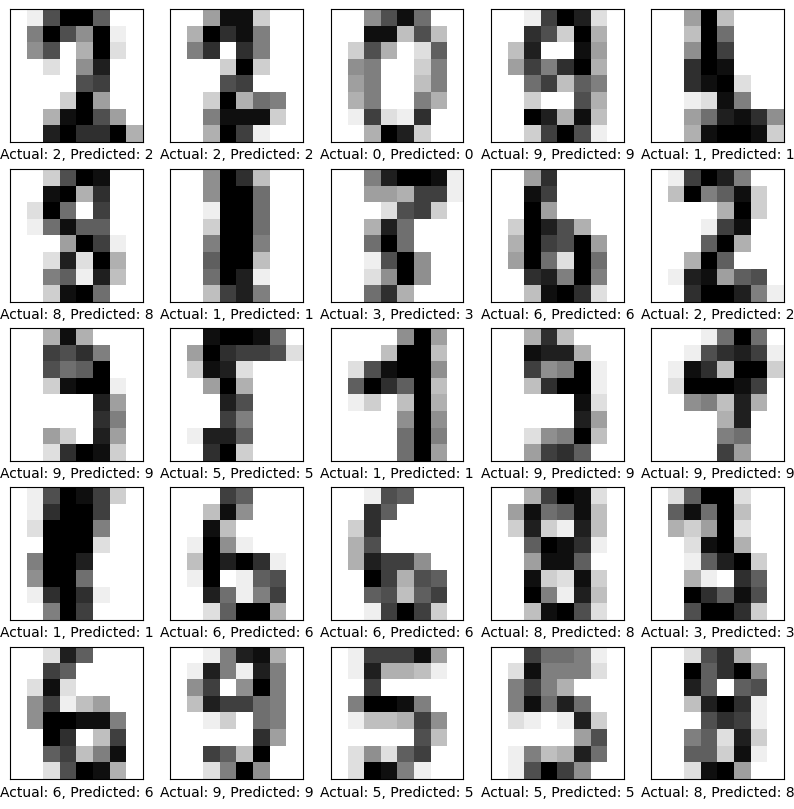

In [8]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.binary)
    actual_value = y_test[i]
    predicted_value = predictions[i].argmax()
    plt.xlabel(f'Actual: {actual_value}, Predicted: {predicted_value}')

plt.show()

Evaluating the model

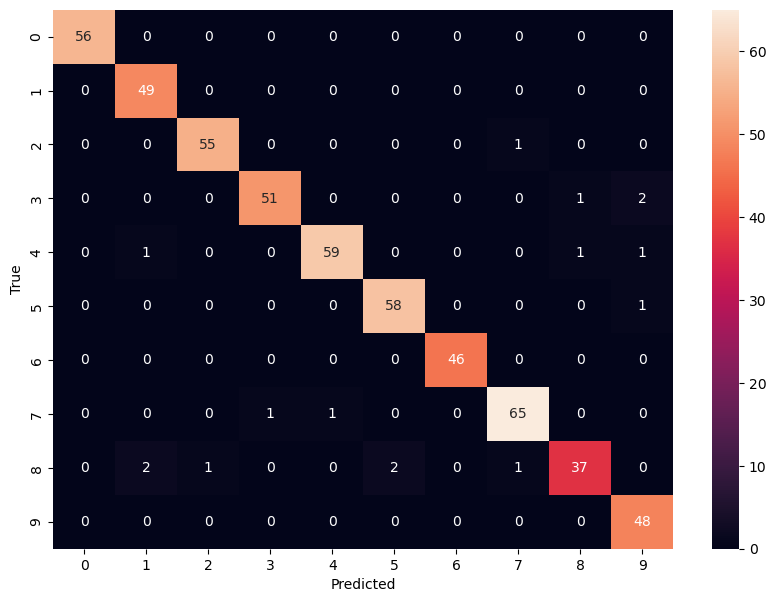

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming predictions is an array of class labels predicted by your model
y_pred = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
import seaborn as sn


plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [10]:
from sklearn.metrics import accuracy_score

# Assuming y_pred is the predicted labels
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.04%
